In [1]:
%load_ext autoreload
%autoreload 2  
%reload_ext autoreload

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tskit as tsk
from bgspy.recmap import RecMap
from bgspy.utils import load_seqlens, load_pickle

# Validation and Cleanup of the Hinch et al. Recombination Map

The source of the hg36 recombination map is [here](https://www.well.ox.ac.uk/~anjali/AAmap/). See the `Snakefile` for the processing of this. This is just to ensure the processing/liftover/scaling etc is correct. We need to remove some outliers.

In [3]:
hg38sl = load_seqlens('../data/annotation/hg38_seqlens.tsv')
chroms = list(hg38sl.keys())

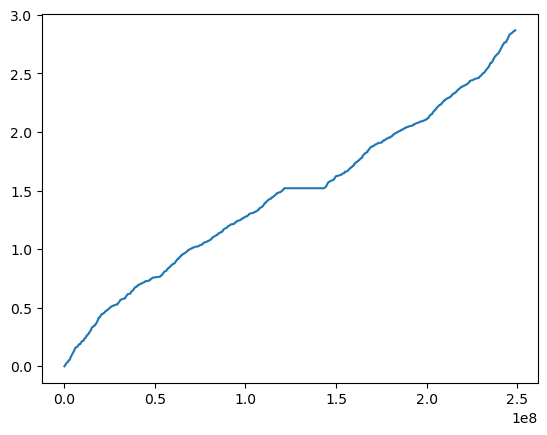

In [4]:
# first we load the HapMap lifted over to hg38
hm = RecMap('../data/annotation/hapmap_genetic_map.txt', 
            seqlens=hg38sl)

hmcr = hm.cum_rates['chr1']
plt.plot(hmcr.end, hmcr.rate)

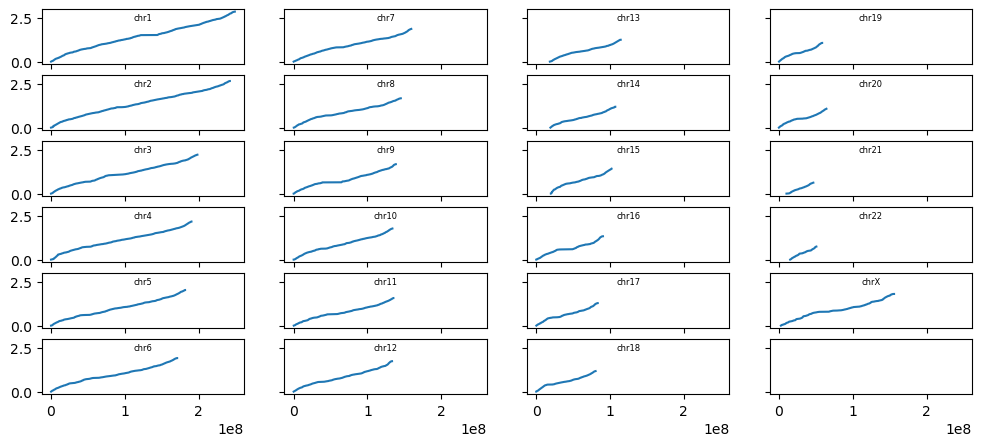

In [5]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    hmcr = hm.cum_rates[chrom]
    fax.plot(hmcr.end, hmcr.rate)
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

## Load in Original hg36 version

This has been coverted to HapMap from my `tools/liftover_recmap.py`.

In [6]:
hg36sl = load_seqlens('../data/annotation/hg18_seqlens.tsv')
chroms = list(hg36sl.keys())

In [7]:
rm_36 = RecMap('../data/annotation/aamap_hg36.tsv',
               seqlens=hg36sl)

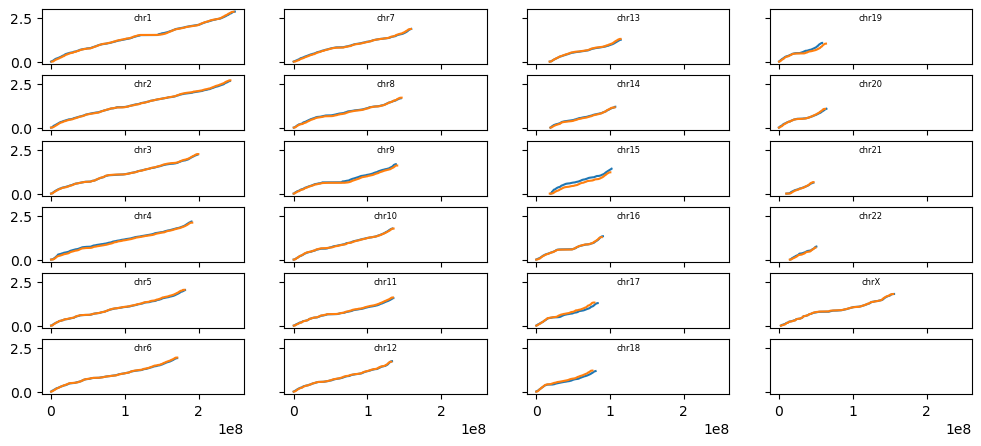

In [8]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    hmcr = hm.cum_rates[chrom]
    fax.plot(hmcr.end, hmcr.rate)
    rm_36cr = rm_36.cum_rates[chrom]
    fax.plot(rm_36cr.end, rm_36cr.rate)    
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

## Load in my liftover from hg36 to hg38

In [9]:
hg38sl = load_seqlens('../data/annotation/hg38_seqlens.tsv')
chroms = list(hg38sl.keys())

In [10]:
rm_38 = RecMap('../data/annotation/aamap_hg38.tsv',
               seqlens=hg38sl)

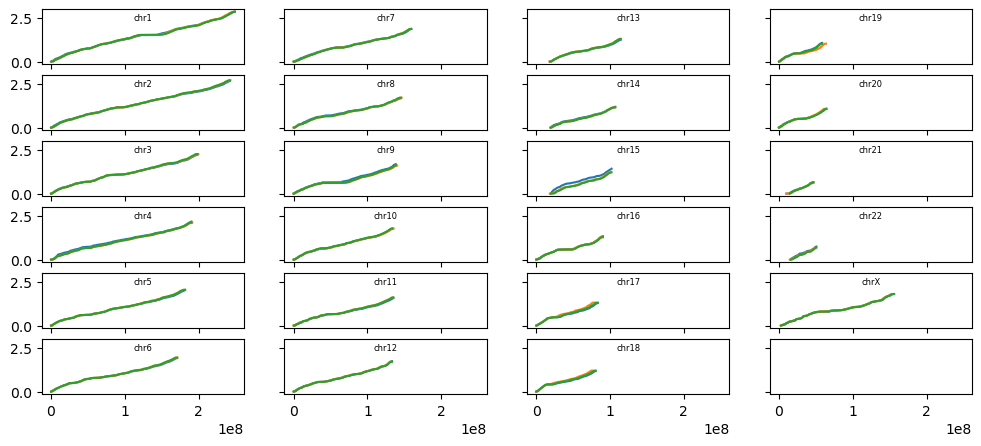

In [11]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    hmcr = hm.cum_rates[chrom]
    fax.plot(hmcr.end, hmcr.rate)
    rm_36cr = rm_36.cum_rates[chrom]
    fax.plot(rm_36cr.end, rm_36cr.rate)    

    rm_38cr = rm_38.cum_rates[chrom]
    fax.plot(rm_38cr.end, rm_38cr.rate)
    
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

The original hapmap (blue) seems to have lots of recombination at the start of chr15 compared to the AA maps.

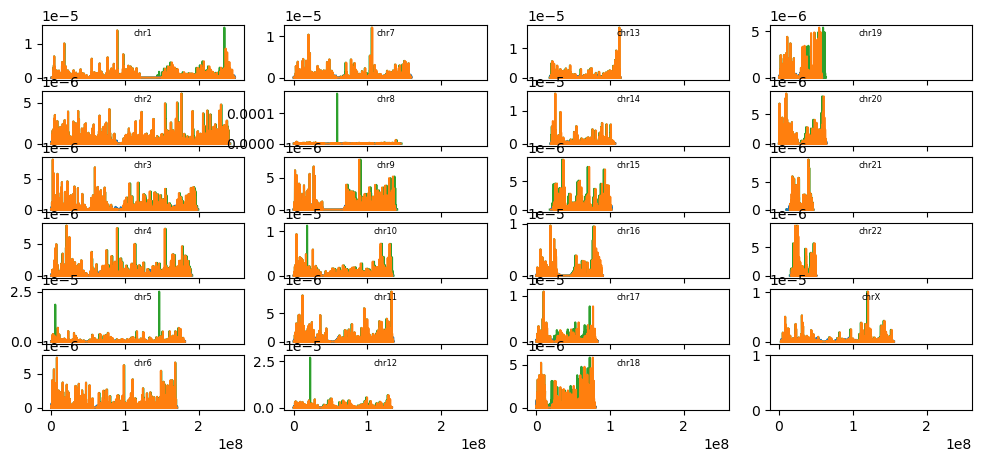

In [12]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=False)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    
    hmr = hm.rates[chrom]
    fax.plot(hmr.end, hmr.rate, zorder=2)
    
    rm_38cr = rm_38.rates[chrom]
    fax.plot(rm_38cr.end, rm_38cr.rate)
    
    rm_36cr = rm_36.rates[chrom]
    fax.plot(rm_36cr.end, rm_36cr.rate, zorder=-1)

    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

NameError: name 'd' is not defined

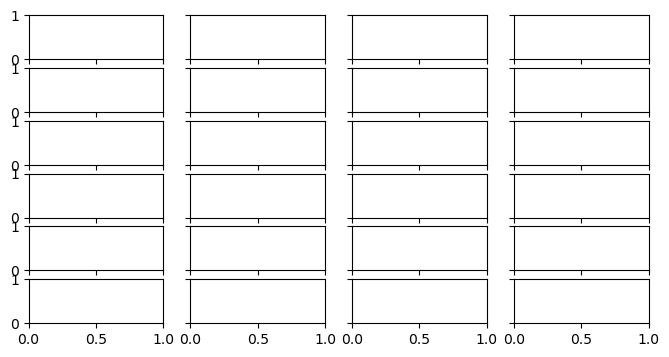

In [13]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(8, 4), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    dc = d.loc[d['chrom'] == chrom]
    fax = ax[col, row]
    fax.plot(0.5*(dc['start']+dc['end']), dc['rate'], label='raw Hinch et al. hg36')
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

In [ ]:
THRESH = 0.001
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(8, 4), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    dc = d.loc[d['chrom'] == chrom]
    dc = dc[dc['rate'] < THRESH]
    fax = ax[col, row]
    fax.plot(0.5*(dc['start']+dc['end']), dc['rate'], label='raw Hinch et al. hg36')
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

In [ ]:
x = np.sort(d['rate'])
plt.scatter(np.arange(len(x)), x, s=0.1, c='k')
plt.loglog()
plt.axhline(THRESH, c='r')

In [ ]:
x = np.sort(d['rate'])
plt.scatter(np.arange(len(x)), x, s=0.1, c='k')
plt.loglog()
plt.xlim(1e5, 5e6)
plt.ylim(1e-8, 0)
plt.axhline(THRESH, c='r')

In [ ]:
nchroms = list(range(1, 23))

def read(c):
    return pd.read_table(f"../data/annotation/maps_b37/maps_chr.{c}",
                         skiprows=1, sep=' ', 
                         names=('pos', 'rate'))

# hg36 hinch (no liftover)
raw_lo37 = {f"chr{c}": read(c) for c in nchroms}

In [ ]:
THRESH = 0.002
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    dc = d.loc[d['chrom'] == chrom]
    dc = dc.sort_values(['start', 'end'])
    fax = ax[col, row]    
    fax.plot(dc['end'], 1/100 * np.cumsum(dc['rate'] * (dc['end']-dc['start'])), label='liftover Hinch hg38')
    
    hmcr = hm.cum_rates[chrom]
    fax.plot(hmcr.end, hmcr.rate)
    
    # if chrom in raw_lo37:
    #     dh = raw_lo37[chrom]
    #     x, y = dh['pos'], dh['rate']
    #     fax.plot(x, y)
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

Note the outliers — these are all in the original map, but I remove them in the `liftover_recmap.py` tool, since that
filters out markers with rates $r < 100 \sigma$

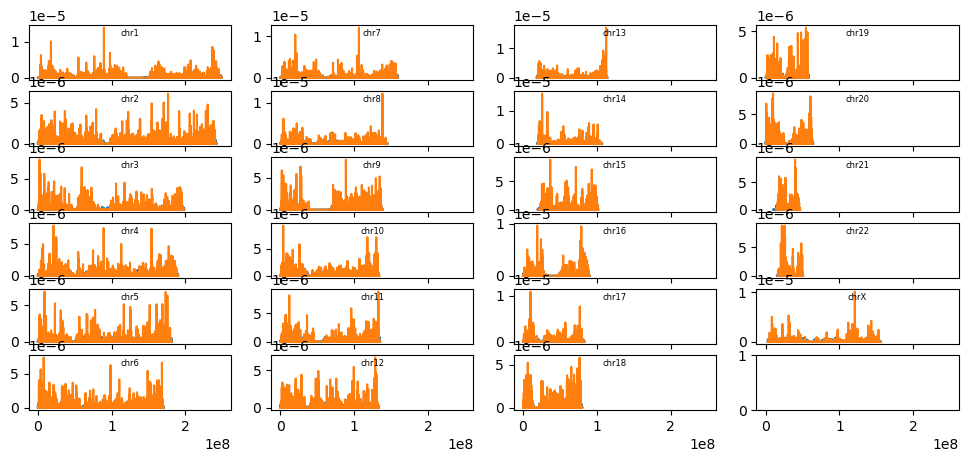

In [25]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=False)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    
    hmr = hm.rates[chrom]
    fax.plot(hmr.end, hmr.rate)
    
    rm_38r = rm_38.rates[chrom]
    fax.plot(rm_38r.end, rm_38r.rate)

    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

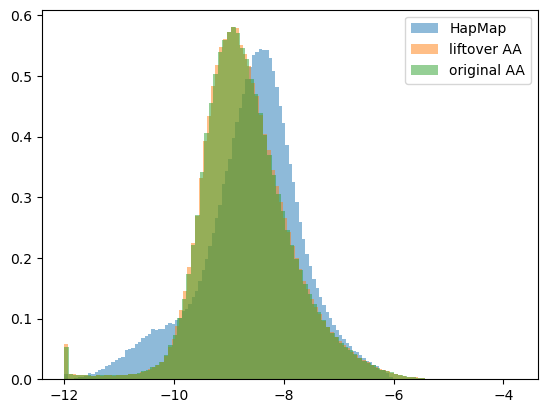

In [53]:
def all_rates(rm):
    return np.array(list(itertools.chain(*[r[1] for r in rm.rates.values()])))

fig, ax = plt.subplots()
ax.hist(np.log10(1e-12+all_rates(hm)), 100, density=True, alpha=0.5, label="HapMap")
ax.hist(np.log10(1e-12+all_rates(rm_38)), 100, density=True, alpha=0.5, label="liftover AA")
ax.hist(np.log10(1e-12+all_rates(rm_36)), 100, density=True, alpha=0.5, label="original AA")
ax.legend()